In [1]:
import sandy
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from scipy.stats import lognorm

In [2]:
dummy_cov = np.asarray([[5/100,-4/70],[-4/70,3/49]])
dummy_mean = np.array([10,7])
dummy_center = np.ones(2)
dummy_std = np.array([np.sqrt(5/100), np.sqrt(3/49)])

In [3]:
np.linalg.eig(dummy_cov)[0]

array([-0.00180555,  0.11303004])

## Normal

In [4]:
df = pd.DataFrame(np.random.multivariate_normal(dummy_center, dummy_cov, size=100000))

C:\Users\fgrimald\Anaconda3\envs\sandy-devel\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  """Entry point for launching an IPython kernel.


C:\Users\fgrimald\Anaconda3\envs\sandy-devel\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


covariance:
             0            1
0  5.20090e-02 -5.54222e-02
1 -5.54222e-02  6.29466e-02


mean: [0.9985995187349177, 1.0013409372557802]


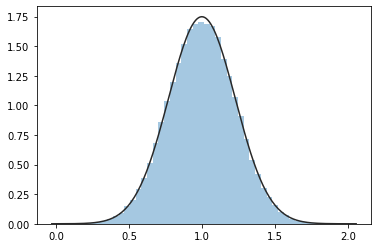

In [5]:
sns.distplot(x=df.iloc[:,0], fit=norm, kde=False)
print(f"""covariance:
{df.cov()}


mean: {[df.iloc[:,0].mean(), df.iloc[:,1].mean()]}""")

C:\Users\fgrimald\Anaconda3\envs\sandy-devel\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

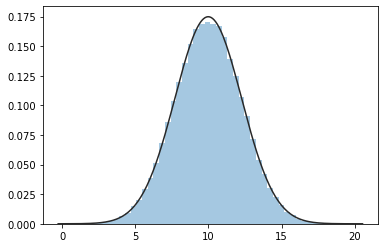

In [6]:
samples = df.iloc[:,0]*dummy_mean[0]
sns.distplot(x=samples, fit=norm, kde=False)

## Lognormal

In [7]:
normal_equivalent_cov = (np.exp(dummy_cov)-1)*np.prod(dummy_center) # vale per una matrice 2x2 va bene la divisione per 1 ??
normal_equivalent_mean = np.log(dummy_center)-dummy_std**2/2

In [8]:
df = pd.DataFrame(np.random.multivariate_normal(normal_equivalent_mean, normal_equivalent_cov, size=100000)).apply(np.exp)

C:\Users\fgrimald\Anaconda3\envs\sandy-devel\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


covariance:
             0            1
0  5.31208e-02 -5.44075e-02
1 -5.44075e-02  6.55034e-02


mean: [1.0020049889308882, 0.9998691171462163]


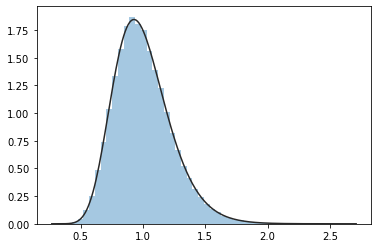

In [9]:
sns.distplot(x=df.iloc[:,0], fit=lognorm, kde=False)
print(f"""covariance:
{df.cov()}


mean: {[df.iloc[:,0].mean(), df.iloc[:,1].mean()]}""")

C:\Users\fgrimald\Anaconda3\envs\sandy-devel\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

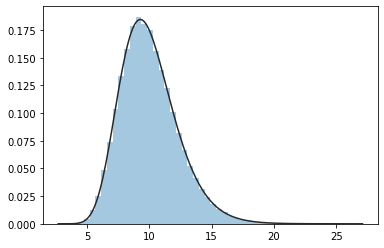

In [10]:
samples = df.iloc[:,0]*dummy_mean[0]
sns.distplot(x=samples, fit=lognorm, kde=False)

In [11]:
dd = pd.concat([df.iloc[:,0]*dummy_mean[0], df.iloc[:,1]*dummy_mean[1]], ignore_index=True, axis=1)

In [12]:
dd.cov()

,0,1
0,5.31208e+00,-3.80852e+00
1,-3.80852e+00,3.20967e+00


# Test case: Eu155

$$ cov(x_i, x_j) = (e^{cov(ln(x_i),ln(x_j))}-1)\cdot<x_i><x_j> $$

In [13]:
endf6 = sandy.get_endf6_file('jeff_33','xs', 631550)
# endf6 = sandy.get_endf6_file('jeff_33','xs', 922350)  # This was tested. It gives no error, but its smaller std gives less evident results

In [14]:
Cov = sandy.XsCov.from_endf6(endf6)
BE = sandy.Xs.from_endf6(endf6)

## Normal

In [15]:
df = pd.DataFrame(np.random.multivariate_normal(np.ones(len(Cov)), Cov, size=1000000))

C:\Users\fgrimald\Anaconda3\envs\sandy-devel\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  """Entry point for launching an IPython kernel.


C:\Users\fgrimald\Anaconda3\envs\sandy-devel\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)




mean: [1.0121642034099827, 0.9877881883231315]


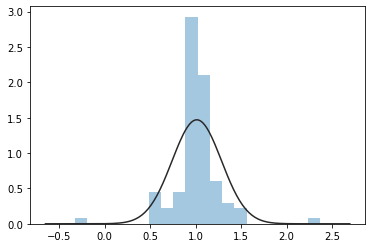

In [16]:
sns.distplot(x=df.iloc[0,:], bins= 20, fit=norm, kde=False)
print(f"""

mean: {[df.iloc[0,:].mean(), df.iloc[-1,:].mean()]}""")

In [17]:
df.values.min()

-3.8227812066967903

## Lognormal

In [18]:
COV = Cov.apply(np.exp) - 1 * 1 * 1  # Target mean to 1

In [19]:
std = Cov.std(axis=1)

In [20]:
normal_equivalent_mean = np.log(np.ones(len(Cov))) - std**2/2

In [21]:
df = pd.DataFrame(np.random.multivariate_normal(normal_equivalent_mean, COV, size=1000000)).apply(np.exp)

C:\Users\fgrimald\Anaconda3\envs\sandy-devel\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  """Entry point for launching an IPython kernel.


C:\Users\fgrimald\Anaconda3\envs\sandy-devel\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)




mean: [1.20369023059764, 0.9731406456293668]


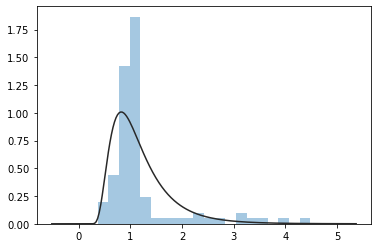

In [22]:
sns.distplot(x=df.iloc[0,:], bins= 20, fit=lognorm, kde=False)
print(f"""

mean: {[df.iloc[0,:].mean(), df.iloc[-1,:].mean()]}""")

In [23]:
df.values.min()

0.0033834335974203393

## Comparison with what is implemented in CategoryCov

Consider the negative eigenvalues are set to 0 in CategoryCov sampling method, but not in our proposed procedure.
Eigenvalues could be set to zero in the latter as well, if one wants.

In [24]:
CatCov = sandy.CategoryCov(Cov)

In [25]:
pd.DataFrame(np.cov(CatCov.sampling(nsmp=10000, tolerance=0).data.T))

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
0,4.00048e-02,5.98436e-05,-3.92647e-04,-3.84067e-04,-3.75754e-04,-3.57726e-04,-3.38367e-04,-3.22556e-04,-3.07676e-04,-2.74470e-04,...,4.55143e-04,3.06360e-04,1.91340e-04,1.81393e-04,2.06283e-04,3.18997e-04,4.02209e-04,4.18267e-04,4.24544e-04,0.00000e+00
1,5.98436e-05,4.04883e-02,-1.79973e-04,-1.81088e-04,-1.80794e-04,-1.83400e-04,-1.83638e-04,-1.82826e-04,-1.82604e-04,-1.78755e-04,...,-8.31376e-04,-9.64756e-04,-8.13495e-04,-5.37095e-04,-1.74075e-04,4.75232e-04,1.00364e-03,1.25044e-03,1.33479e-03,0.00000e+00
2,-3.92647e-04,-1.79973e-04,5.09542e-02,5.09293e-02,5.08666e-02,5.06090e-02,5.01606e-02,4.96654e-02,4.92261e-02,4.81917e-02,...,-4.22971e-04,-5.64607e-04,-8.54418e-04,-1.15239e-03,-1.43982e-03,-1.86801e-03,-2.16111e-03,-2.30965e-03,-2.30495e-03,0.00000e+00
3,-3.84067e-04,-1.81088e-04,5.09293e-02,5.09358e-02,5.09079e-02,5.07222e-02,5.03485e-02,4.99126e-02,4.95165e-02,4.85625e-02,...,-4.01526e-04,-5.49476e-04,-8.49430e-04,-1.16049e-03,-1.46338e-03,-1.91669e-03,-2.22540e-03,-2.37902e-03,-2.37511e-03,0.00000e+00
4,-3.75754e-04,-1.80794e-04,5.08666e-02,5.09079e-02,5.09189e-02,5.08137e-02,5.05235e-02,5.01545e-02,4.98069e-02,4.89439e-02,...,-3.77711e-04,-5.31561e-04,-8.41674e-04,-1.16602e-03,-1.48471e-03,-1.96387e-03,-2.28891e-03,-2.44791e-03,-2.44495e-03,0.00000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,3.18997e-04,4.75232e-04,-1.86801e-03,-1.91669e-03,-1.96387e-03,-2.06785e-03,-2.16674e-03,-2.24508e-03,-2.30720e-03,-2.43846e-03,...,6.66489e-02,1.34336e-01,2.22292e-01,3.21856e-01,4.25727e-01,5.81185e-01,6.71899e-01,7.03626e-01,6.99298e-01,0.00000e+00
95,4.02209e-04,1.00364e-03,-2.16111e-03,-2.22540e-03,-2.28891e-03,-2.42620e-03,-2.55909e-03,-2.66459e-03,-2.74650e-03,-2.91497e-03,...,1.67091e-02,8.71704e-02,1.93131e-01,3.20324e-01,4.58330e-01,6.71899e-01,8.02424e-01,8.49672e-01,8.49117e-01,0.00000e+00
96,4.18267e-04,1.25044e-03,-2.30965e-03,-2.37902e-03,-2.44791e-03,-2.59617e-03,-2.74017e-03,-2.85473e-03,-2.94311e-03,-3.12379e-03,...,-1.58147e-03,6.83427e-02,1.80421e-01,3.17648e-01,4.68239e-01,7.03626e-01,8.49672e-01,9.03303e-01,9.04415e-01,0.00000e+00
97,4.24544e-04,1.33479e-03,-2.30495e-03,-2.37511e-03,-2.44495e-03,-2.59493e-03,-2.74089e-03,-2.85710e-03,-2.94652e-03,-3.12872e-03,...,-1.16423e-02,5.61071e-02,1.68103e-01,3.06565e-01,4.59358e-01,6.99298e-01,8.49117e-01,9.04415e-01,9.06356e-01,0.00000e+00


In [26]:
df = pd.DataFrame(np.random.multivariate_normal(np.ones(len(Cov)), Cov, size=10000))
df.cov()

C:\Users\fgrimald\Anaconda3\envs\sandy-devel\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
0,3.97923e-02,-5.12307e-04,2.64922e-04,2.70270e-04,2.78483e-04,2.93023e-04,3.10904e-04,3.26770e-04,3.41203e-04,3.74337e-04,...,5.71236e-04,4.75553e-04,3.60468e-04,2.43665e-04,1.03731e-04,-1.09046e-04,-2.41247e-04,-2.81858e-04,-2.91476e-04,1.03116e-13
1,-5.12307e-04,3.96743e-02,-2.81972e-04,-2.80815e-04,-2.82006e-04,-2.82128e-04,-2.82559e-04,-2.81772e-04,-2.81187e-04,-2.82300e-04,...,2.89908e-04,3.38865e-04,2.95434e-04,1.01947e-04,-1.66066e-04,-6.62572e-04,-9.92465e-04,-1.09084e-03,-1.13333e-03,-2.18815e-11
2,2.64922e-04,-2.81972e-04,5.05974e-02,5.05577e-02,5.04771e-02,5.01845e-02,4.97021e-02,4.91794e-02,4.87211e-02,4.76486e-02,...,2.35513e-04,8.22244e-05,3.75567e-05,8.40340e-05,1.52724e-04,3.30908e-04,5.14868e-04,6.15117e-04,6.46696e-04,-1.86658e-11
3,2.70270e-04,-2.80815e-04,5.05577e-02,5.05495e-02,5.05038e-02,5.02834e-02,4.98759e-02,4.94131e-02,4.89982e-02,4.80072e-02,...,2.49482e-04,9.74075e-05,4.30587e-05,7.44618e-05,1.24402e-04,2.71001e-04,4.32333e-04,5.22737e-04,5.52274e-04,-1.80195e-11
4,2.78483e-04,-2.82006e-04,5.04771e-02,5.05038e-02,5.04973e-02,5.03577e-02,5.00345e-02,4.96393e-02,4.92733e-02,4.83745e-02,...,2.66310e-04,1.13699e-04,4.61071e-05,5.78576e-05,8.38165e-05,1.90495e-04,3.23760e-04,4.02228e-04,4.29494e-04,-1.69466e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,-1.09046e-04,-6.62572e-04,3.30908e-04,2.71001e-04,1.90495e-04,4.68781e-05,-1.17262e-04,-2.34838e-04,-3.21934e-04,-4.52706e-04,...,6.80709e-02,1.34001e-01,2.19665e-01,3.16311e-01,4.16910e-01,5.67194e-01,6.54883e-01,6.85644e-01,6.81299e-01,3.02525e-12
95,-2.41247e-04,-9.92465e-04,5.14868e-04,4.32333e-04,3.23760e-04,1.27074e-04,-9.64458e-05,-2.59425e-04,-3.81619e-04,-5.73470e-04,...,1.58949e-02,8.41742e-02,1.87571e-01,3.11682e-01,4.46379e-01,6.54883e-01,7.82565e-01,8.28925e-01,8.28476e-01,-4.49642e-12
96,-2.81858e-04,-1.09084e-03,6.15117e-04,5.22737e-04,4.02228e-04,1.82772e-04,-6.63363e-05,-2.49052e-04,-3.86553e-04,-6.05730e-04,...,-3.25340e-03,6.43835e-02,1.73833e-01,3.07948e-01,4.55244e-01,6.85644e-01,8.28925e-01,8.81693e-01,8.82951e-01,-9.88098e-12
97,-2.91476e-04,-1.13333e-03,6.46696e-04,5.52274e-04,4.29494e-04,2.05392e-04,-4.88375e-05,-2.35855e-04,-3.76796e-04,-6.02882e-04,...,-1.37242e-02,5.17390e-02,1.61141e-01,2.96562e-01,4.46161e-01,6.81299e-01,8.28476e-01,8.82951e-01,8.85054e-01,-1.07296e-11


In [27]:
import os
os.system('jupyter nbconvert --to html random_multivariate.ipynb')

0